In [0]:
#Зчитуємо дані з таблиці Gold рівня "gold_daily_stock"
gold_daily = spark.read.format("delta").load("/FileStore/delta/gold_daily_stock")

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

# Конвертуємо Spark DataFrame у Pandas для побудови графіка
df_pandas = gold_daily.toPandas()

# Групуємо дані за роками та компаніями
df_grouped = df_pandas.groupby(["Year", "Company"])["avg_daily_close"].mean().reset_index()

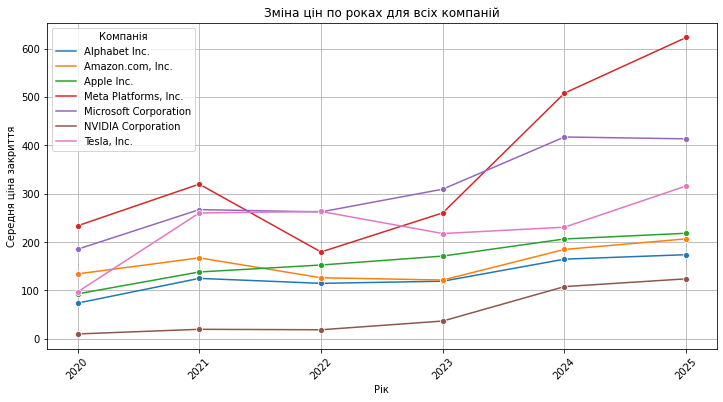

In [0]:
plt.figure(figsize=(12, 6))

# Використовуємо Seaborn для покращеної візуалізації
sns.lineplot(data=df_grouped, x="Year", y="avg_daily_close", hue="Company", marker="o")

plt.xlabel("Рік")
plt.ylabel("Середня ціна закриття")
plt.title("Зміна цін по роках для всіх компаній")
plt.xticks(rotation=45)
plt.legend(title="Компанія")
plt.grid()

plt.show()